In [1]:
from nltk import word_tokenize
import pandas as pd
import nltk
import numpy as np  
import random  
import string

import bs4 as bs  
import urllib.request  
import re  

In [1]:
raw_html = urllib.request.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')  
raw_html = raw_html.read()
article_html = bs.BeautifulSoup(raw_html, 'lxml')
article_paragraphs = article_html.find_all('p')
article_text = ''

for para in article_paragraphs:  
    article_text += para.text

corpus = nltk.sent_tokenize(article_text)
for i in range(len(corpus )):
    corpus [i] = corpus [i].lower()
    corpus [i] = re.sub(r'\W',' ',corpus [i])
    corpus [i] = re.sub(r'\s+',' ',corpus [i])

In [2]:
df = pd.read_csv('/home/ifte/Downloads/chat_history.csv')

In [74]:
x = df.query_cleaning.values.tolist()

In [26]:
len(x)

5130

In [75]:
import MeCab
tagger = MeCab.Tagger("-Owakati")

In [3]:
x = ['docomo 電話番号 なん ログイン dアカウント 違い',
 'docomo ケータイ回線契約 退会 ポイント 利用 できる',
 '使用 チケット ある docomo 携帯電話 電話 解約',
 'docomo ケータイ回線契約 退会 ポイント 利用 できる',
 '使用 チケット ある docomo 携帯電話 電話 解約',
 '退会 docomo ポイント ケータイ回線契約 できる 利用',
 'docomo 携帯電話 ある 解約 電話 使用 チケット',
 '契約者 docomo 回線 できる 利用',
 '提供 支払い docomo サービス',
 '使う dポイント 合算 可能 docomo ポイント',
 '退会 docomo 引き継ぐ 回線 できる 情報 利用 契約',
 'イン docomo 会社 いい 情報 引き継ぐ ポート 利用',
 'ユーザー docomo ない 利用可能',
 'ユーザー docomo ない 利用可能',
 'docomo ない ユーザー 利用可能',
 'docomo ポイント 獲得 なる',
 '宿泊 docomo 携帯電話 予約 ある 解約 電話',
 '獲得 なる ポイント docomo',
 'ない ユーザー 利用可能 docomo',
 '使う ポイント dポイント 合算 可能 docomo',
 'https drive google com drive folders iuioukhvte jgqrwdcfnowjzxoq',
 '会員登録 正しい 電話番号 入力 た かかわる ぬ 電話番号 認証 sms 届く ない 良い です',
 '予約 宿泊施設 電話番号 教える',
 '携帯電話 電話 パソコン チケット 購入 利用 できる',
 'dトラベル カスタマーサポート 電話番号 教える 国内宿泊',
 'dトラベル 電子チケット カスタマーサポート 電話番号 教える',
 '携帯電話 電話 パソコン チケット 購入 利用 できる',
 'dトラベル カスタマーサポート 電話番号 教える 国内宿泊',
 'dトラベル 電子チケット カスタマーサポート 電話番号 教える',
 'できる 電話 予約']

In [77]:
collector = []
for items in x:
    collector.append(tagger.parse(items))

In [5]:
collector=x

In [6]:
words = ' '.join(collector).split()

In [7]:
wordfreq = {}
for token in ' '.join(collector).split():
    if token not in wordfreq.keys():
        wordfreq[token] = 1
    else:
        wordfreq[token] += 1

In [8]:
import heapq
most_freq = heapq.nlargest(1000, wordfreq, key=wordfreq.get)

In [9]:
word_idf_values = {}
for token in most_freq:
    doc_containing_word = 0
    for document in collector:
        if token in document.split():
            doc_containing_word += 1
    word_idf_values[token] = np.log(len(collector)/(1 + doc_containing_word))

In [10]:
word_tf_values = {}
for token in most_freq:
    sent_tf_vector = []
    for document in collector:
        doc_freq = 0
        for word in document.split():
            if token == word:
                  doc_freq += 1
        word_tf = doc_freq/len(document.split())
        sent_tf_vector.append(word_tf)
    word_tf_values[token] = sent_tf_vector

In [11]:
tfidf_values = {}
for token in word_tf_values.keys():
    tfidf_sentences = []
    for tf_sentence in word_tf_values[token]:
        tf_idf_score = tf_sentence * word_idf_values[token]
        tfidf_sentences.append(tf_idf_score)
    tfidf_values[token] = tfidf_sentences

In [24]:
df_tfidf.head()

,docomo,電話番号,利用,できる,ポイント,電話,携帯電話,チケット,ない,教える,...,入力,た,かかわる,ぬ,認証,sms,届く,良い,です,宿泊施設
0,0.059446,0.220293,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.059446,0.000000,0.200662,0.200662,0.220293,0.000000,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.050954,0.000000,0.000000,0.000000,0.000000,0.188822,0.207898,0.22992,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.059446,0.000000,0.200662,0.200662,0.220293,0.000000,0.000000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.050954,0.000000,0.000000,0.000000,0.000000,0.188822,0.207898,0.22992,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_tfidf = pd.DataFrame(tfidf_values)

tfidf_matrix = np.asarray(df_tfidf)

In [21]:
from scipy.sparse import csr_matrix

matrix = csr_matrix(tfidf_matrix)

In [23]:
tfidf_matrix

array([[0.05944582, 0.22029264, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05944582, 0.        , 0.20066213, ..., 0.        , 0.        ,
        0.        ],
       [0.05095356, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.26435117, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.26435117, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [87]:
    import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname='/home/ifte/fresh/amieCore/amie_core/apis/corpus_dashboard/font/japanese.ttf', size=15)

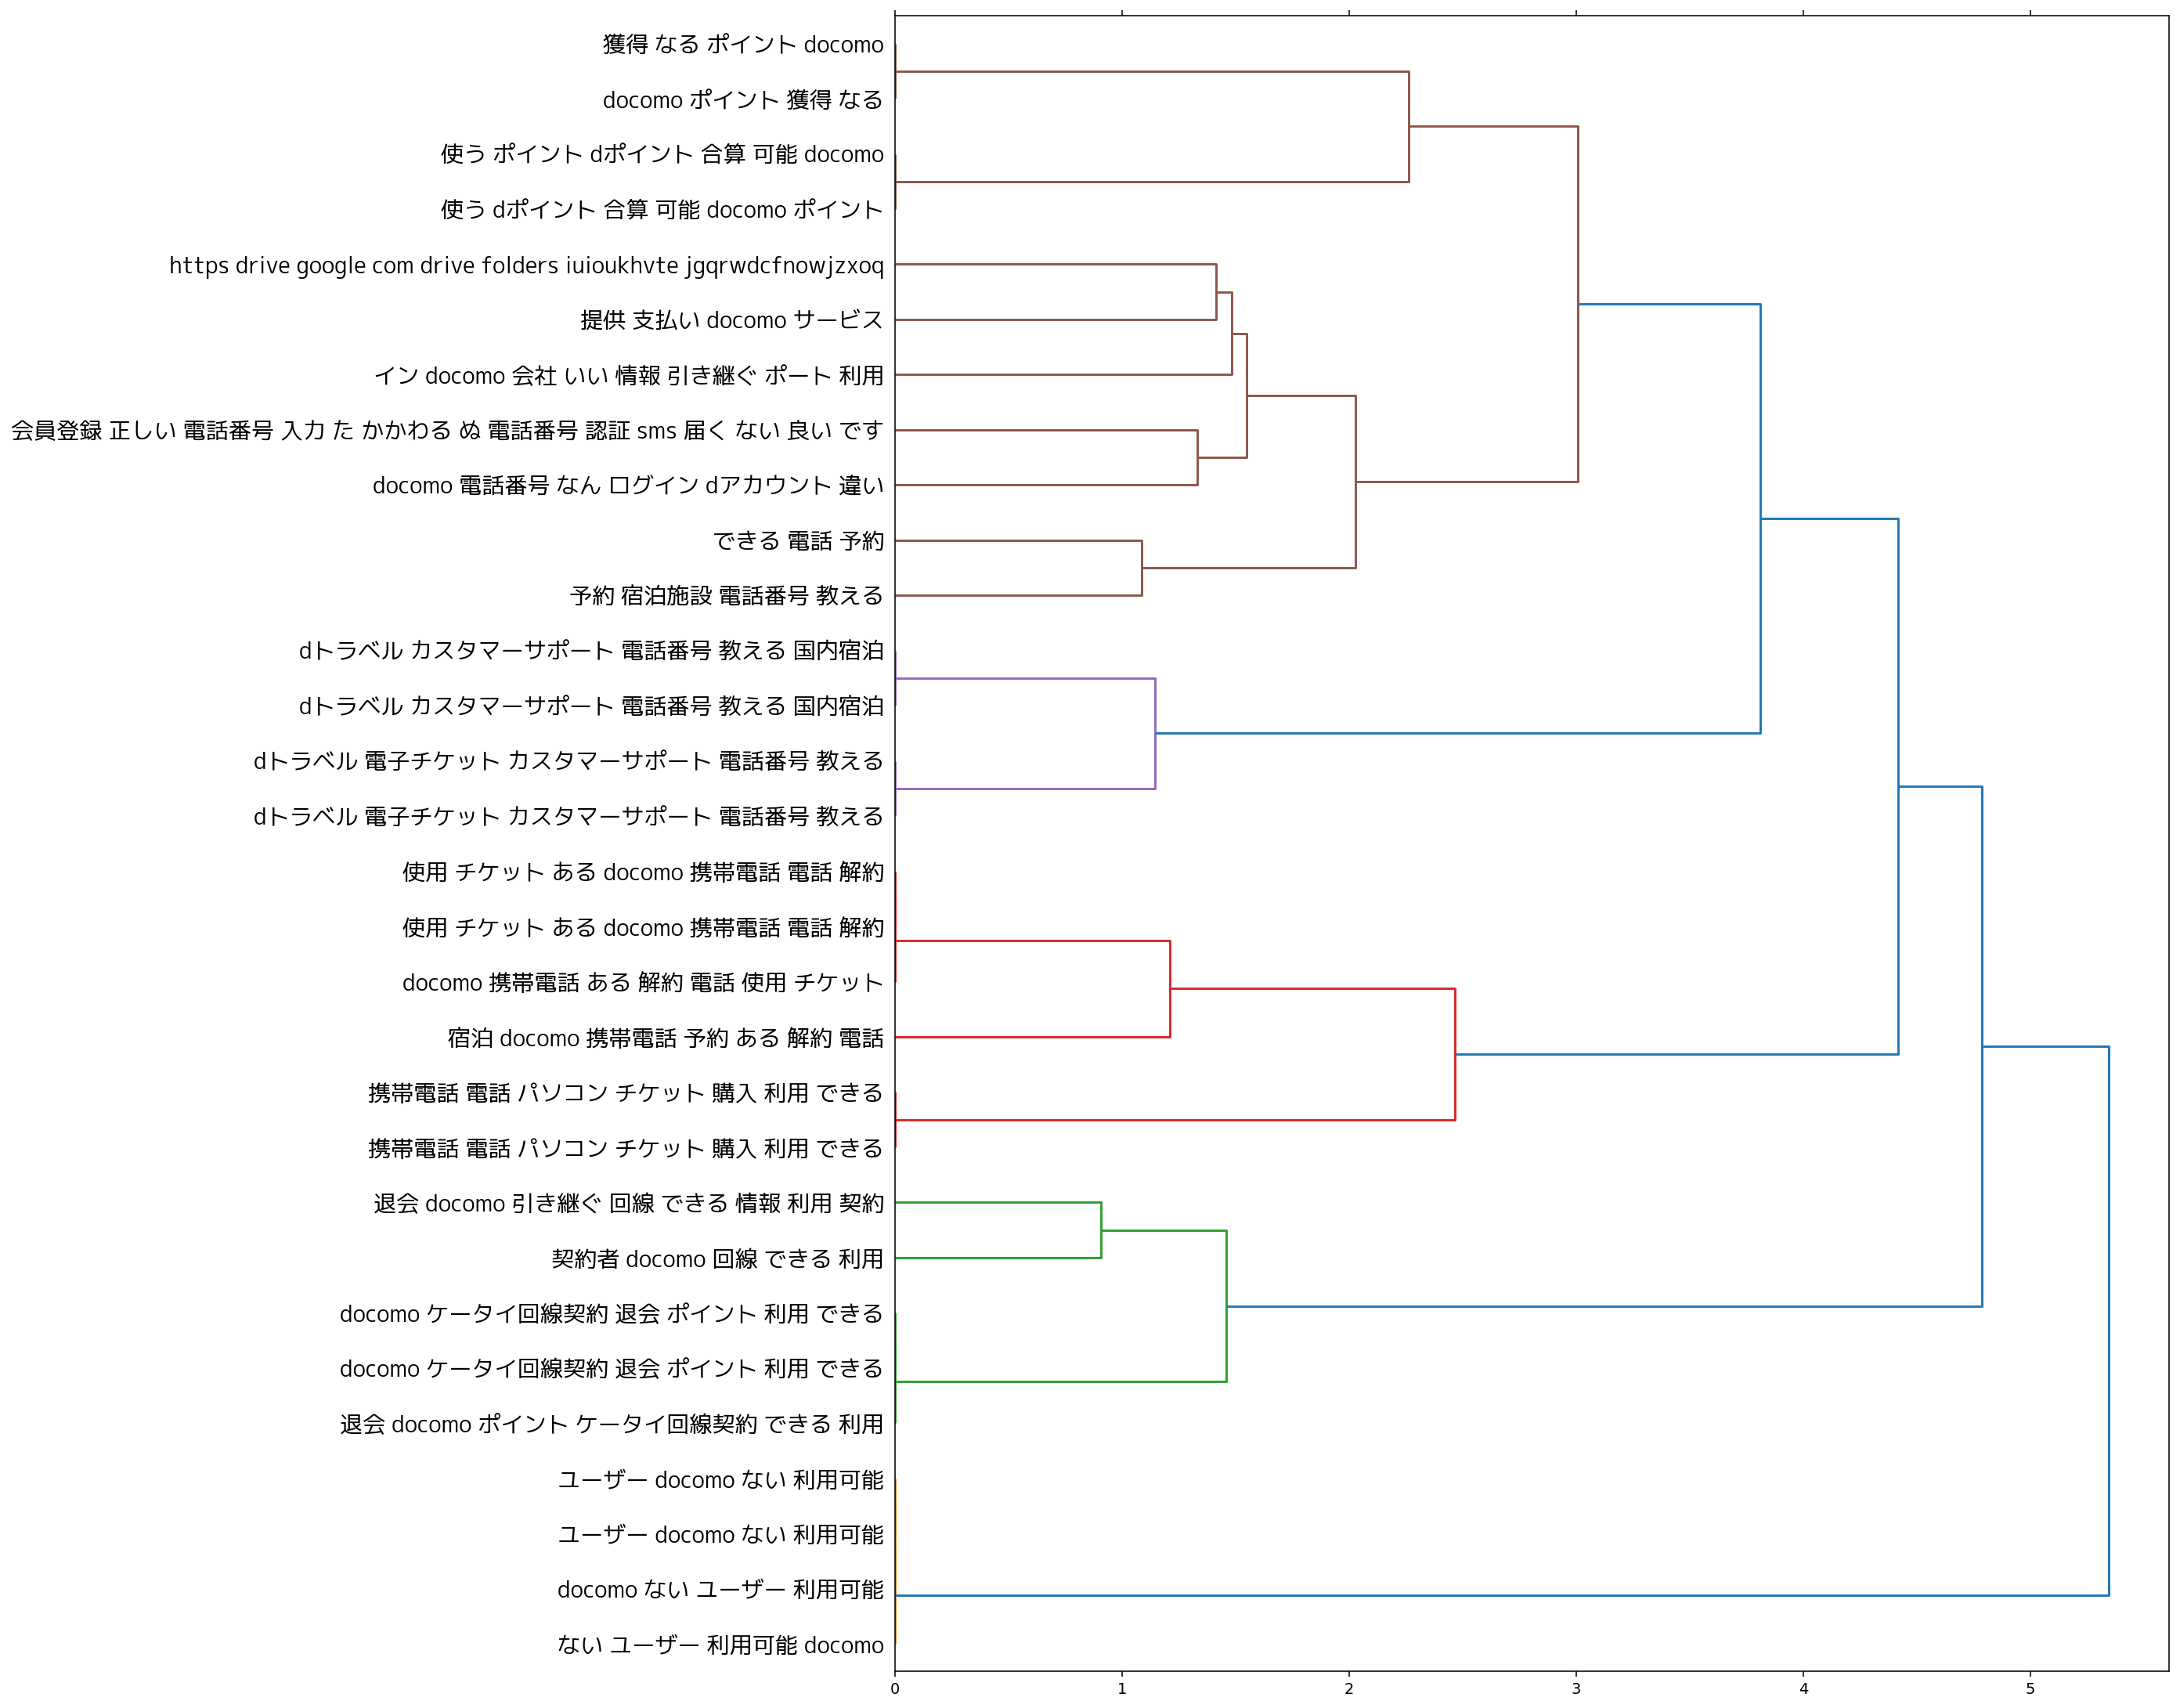

In [92]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=corpus);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(fp)
plt.tight_layout() #show plot with tight layout

In [28]:
plt.show()

/home/ifte/environments/experiment_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.
